# Determination of Cauchy constant

## 1.Introduction

Refractive index of transparent medium is \
\begin{equation}
\mu=\frac{\text{velocity in vacuum(c)}}{\text{velocity in medium(v)}}
\end{equation}

But,by Snell's law\
\begin{equation}
\mu=\frac{\sin i}{\sin r}
\end{equation}

<div><img src="image/dispersion.jpg" width="200"/></div>

Angle of deviation($\delta$) are not same for all colour of light.
Dispersion of white light in prism shows that refractive index($\mu$) of prism differ for different colour of light.
\begin{equation}
\delta=(\mu-1)A
\end{equation}

French mathematician,Augustin-Louis Cauchy (21 August 1789 – 23 May 1857) developed formula called as Cauchy's equation.
\begin{equation}
\mu=A+\frac{B}{\lambda^2}........(1)
\end{equation}
where A and B are constant which depend on nature of medium.It relates refractive index and wave length.

<div><img src="image/cauchy.jpg" width="100"/></div>

## 2.Method

1.Wavelenth of different color of light($\lambda$) are determined by using spectrometer and diffrection grating.Here diffrection grating with 15,000 lines per inch(N) is used for first order diffreaction(n=1).
Then grating space is 
d=1/N
\begin{equation}
d\sin\theta=n\lambda...............(2)
\end{equation}


<div><img src="image/diffraction.jpg" width="200"/></div>
<div><img src="image/grating.jpeg" width="100"/></div>

2.Refractive index($\mu$) for different color of light are determine by using spectrometer and prism.Here minumum deviation($\delta_{min}$)are determined for different color.
A=59.38$^o$ 
\begin{equation}
\mu=\frac{\sin(\delta _{min}+A)/2}{\sin(A/2)}.................(3)
\end{equation}

<div><img src="image/deviation.png" width="200"/></div>
<div><img src="image/spectrometer.jpg" width="200"/></div>

3. From eqn(1)
\begin{equation}
y=A+Bx...............(4)
\end{equation}
where,y=$\mu$ and x=1/$\lambda^2$.This represent shraight line.So A and B are calculated by least square method.\
In this method ,sum of square of error is minimized.

## 3.Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline

In [2]:
N=15000 # lines per inch
d=2.54/N # in cm
n=1
A=59.38 # angle of prism
convdr=np.pi/180 # conversion of degree to radian

In [3]:
df = pd.read_excel ('data/cauchy.xlsx') 
df

,color,diffraction,deviation
0,red,21.90,38.06
1,yellow,18.67,38.52
2,green,17.25,38.54


In [4]:
wav=d*np.sin(convdr*df['diffraction']) # wave length in cm
ref=np.sin(convdr*(df['deviation']+A)/2)/np.sin(convdr*A/2) # refractive index

In [5]:
df['wavelength(nm)']=wav*1e7 # in nm 
df['refractive']=ref
df

,color,diffraction,deviation,wavelength(nm),refractive
0,red,21.90,38.06,631.592645,1.517229
1,yellow,18.67,38.52,542.064767,1.522564
2,green,17.25,38.54,502.143734,1.522796


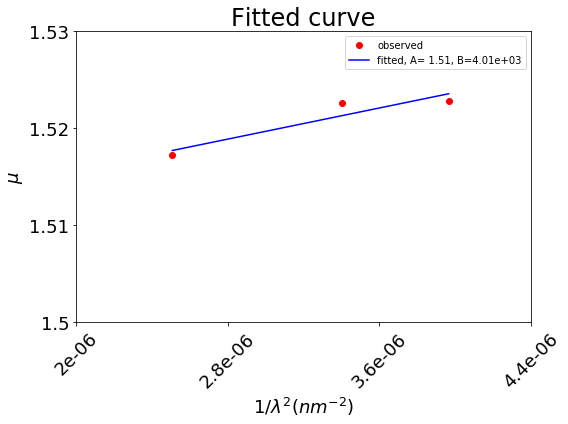

A = 1.51
B= 4.01e+03


In [6]:
x=1/(wav*1e7)**2
y=ref
z=np.polyfit(x, y, 1) # linear  fit y=a+bx
p=np.poly1d(z)  #  [a,b]
ey=p(x) # expected value
A="{:.3}".format(p[0])
B="{:.3}".format(p[1])

fig,ax = plt.subplots(figsize = [8,6])
plt.plot(x, y, 'ro',label='observed')
plt.plot(x, ey, 'b-',label='fitted, A= '+str(A)+', B='+str(B))
ax.set_xticks(np.arange(2.00e-6,4.90e-6,0.8e-6))
ax.set_xticklabels(np.arange(2.00e-6,4.90e-6,0.8e-6), fontsize=18)
ax.set_yticks(np.arange(1.50,1.53,0.01))
ax.set_yticklabels(np.arange(1.50,1.53,0.01), fontsize=18)
ax.tick_params(axis='x', labelrotation= 45)
ax.set_xlabel(r'1/$\lambda^2(nm^{-2})$',fontsize =18,color='k')
ax.set_ylabel(r'$\mu$',fontsize =18,color='k')
plt.legend()
plt.title('Fitted curve',fontsize =24,color='k')
fig.tight_layout() 
plt.savefig("image/fit.png", dpi = 600) # dpi dot per inch
plt.show()
print('A =',A)
print('B=',B)

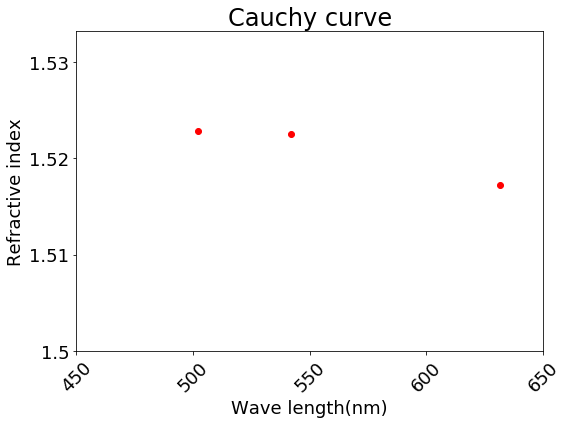

In [7]:
fig,ax = plt.subplots(figsize = [8,6])
plt.scatter(wav*1e7,ref,marker='o',color ='red')
ax.set_xticks(np.arange(450, 700, 50))
ax.set_xticklabels(np.arange(450, 700, 50), fontsize=18)
ax.set_yticks(np.arange(1.50,1.53,0.01))
ax.set_yticklabels(np.arange(1.50,1.53,0.01), fontsize=18)
ax.tick_params(axis='x', labelrotation= 45)
ax.set_xlabel('Wave length(nm)',fontsize =18,color='k')
ax.set_ylabel('Refractive index',fontsize =18,color='k')
plt.title('Cauchy curve',fontsize =24,color='k')
fig.tight_layout() 
plt.savefig("image/fig.png", dpi = 600) # dpi dot per inch
plt.show()

## 4.Result

Cauch constants are 
A = 1.51
B= 4.01e+03/nm$^2$

## Reference
1.https://en.wikipedia.org/wiki/Cauchy%27s_equation \
    2.Subrahmanyam N. and Lal B. - Text Book of Optics, S. Chand and Co., Ltd. (1994)\
    3.Arora C. L. - B.Sc. Practical Physics, S. Chand and Company Ltd. (2010) 
    